# Evaluation

In this notebook, we will perform a more thorough evaluation of the machine learning models trained in the previous notebook (`03_modeling.ipynb`). This evaluation will help us understand the performance and effectiveness of each model in classifying spam emails. We will use various evaluation metrics and visualization techniques to assess the models' strengths and weaknesses.

## Table of Contents

1. [Introduction](#evaluation)
2. [Loading the Data](#loading-the-data)
3. [Confusion Matrix](#confusion-matrix)
4. [Classification Report]
5. [ROC Curve and AUC]
6. [Model Comparison]
7. [Summary and Insights]

## Loading the Data

### 1. Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

### 2. Load Evaluation Results and Preprocessed Data

In [9]:
# Load evaluation_results from pickle file
with open('results/evaluation_results.pkl', 'rb') as f:
    evaluation_results = pickle.load(f)

# Load data_splits from pickle file
with open('data/processed/split/data_splits.pkl', 'rb') as f:
    data_splits = pickle.load(f)

print("Loaded evaluation results for models:", list(evaluation_results.keys()))

Loaded evaluation results for models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'k-Nearest Neighbors', 'Naive Bayes']


## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This matrix gives insight not only into the errors being made by a classifier but also more importantly the types of errors being made.

Components of Confusion Matrix:
* **True Positives (TP)**: The number of correct positive predictions.
* **True Negatives (TN)**: The number of correct negative predictions.
* **False Positives (FP)**: The number of incorrect positive predictions (Type I error).
* **False Negatives (FN)**: The number of incorrect negative predictions (Type II error).

Below, the original and ros dataset confusion matrices are shown side by side for each model.

*Note*: Negative means Ham, and Positive means Spam

In [37]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_true1, y_pred1, y_true2, y_pred2, model_name):
    cm1 = confusion_matrix(y_true1, y_pred1)
    cm2 = confusion_matrix(y_true2, y_pred2)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title(f'{model_name} Original CM')

    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    axes[1].set_title(f'{model_name} ROS CM')

    plt.tight_layout()
    plt.show()

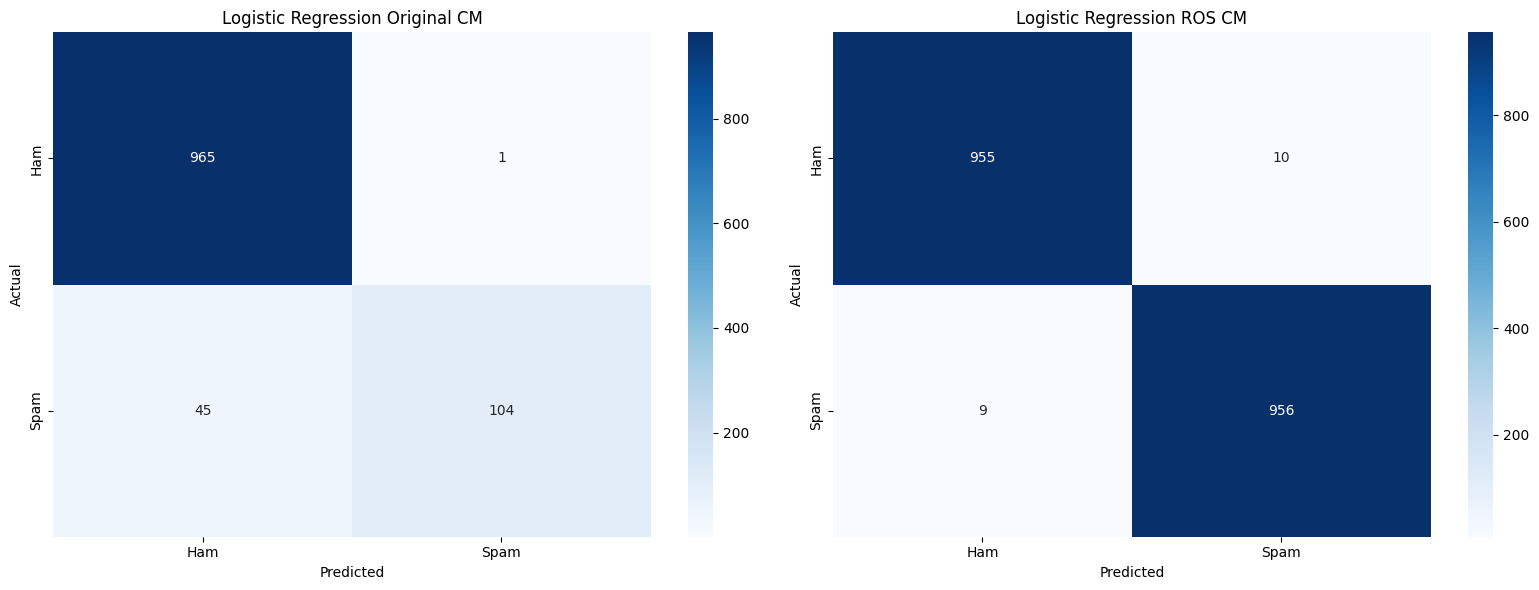

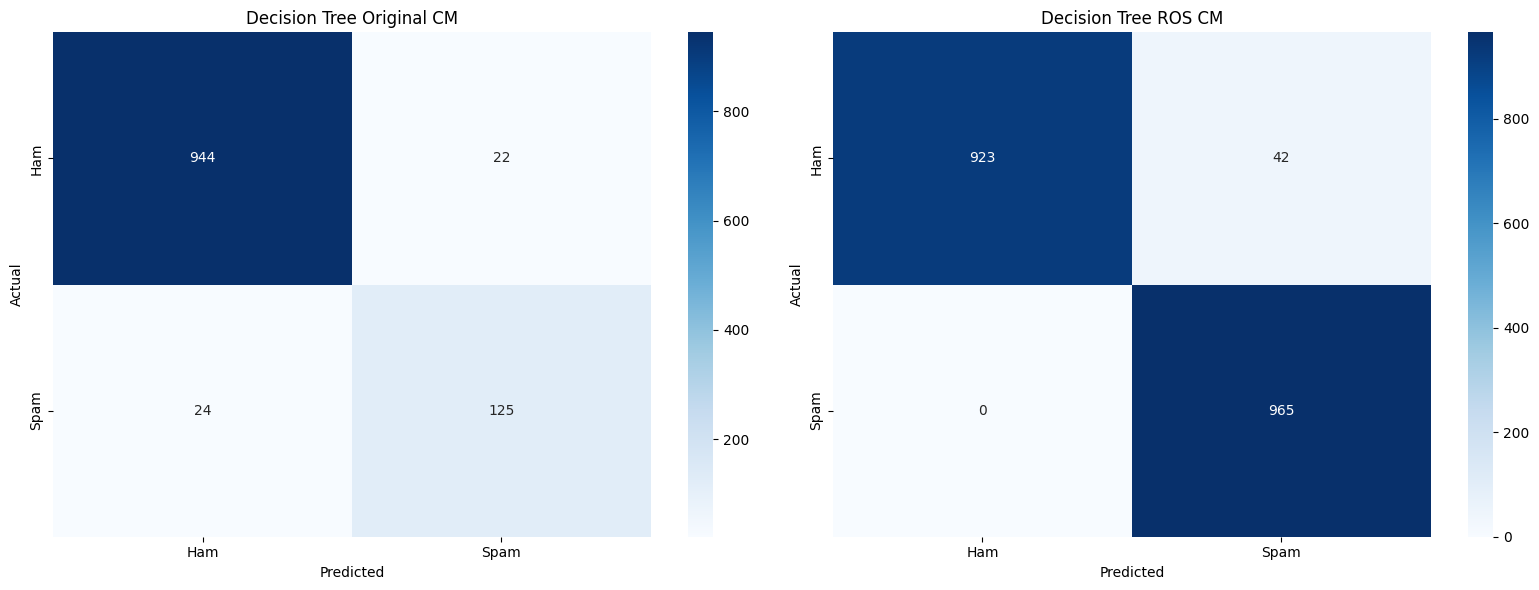

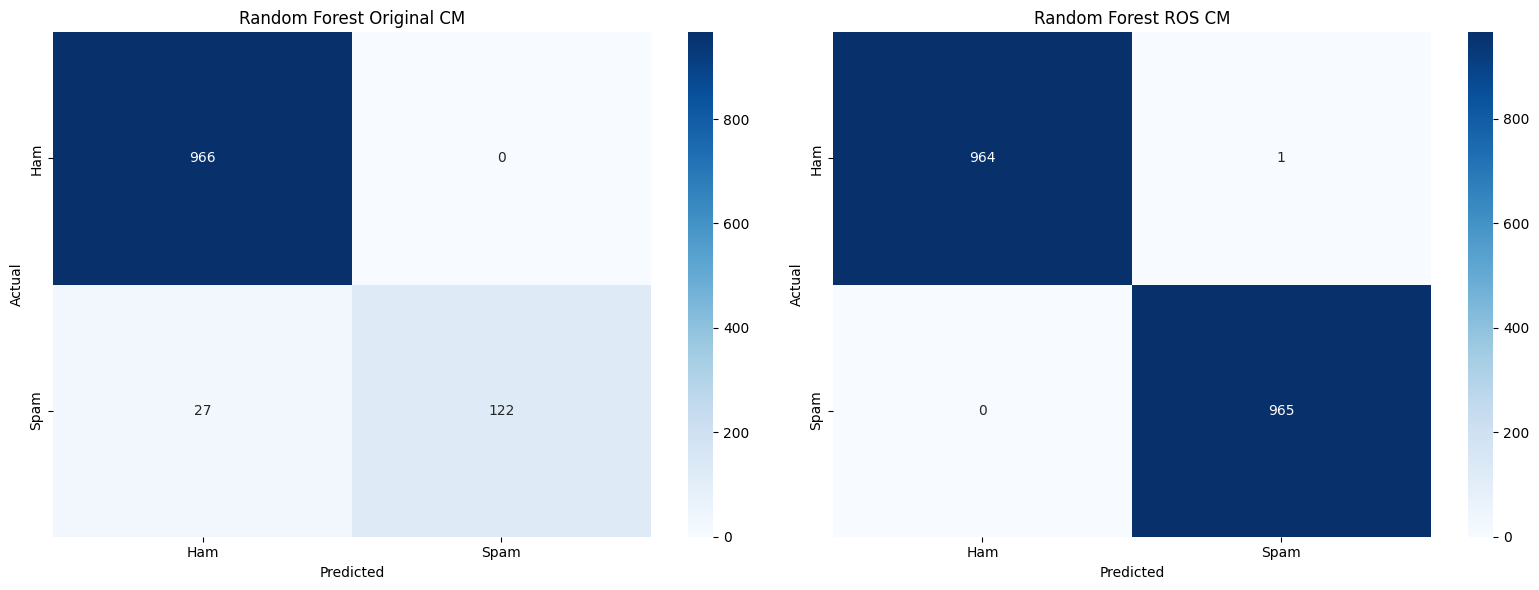

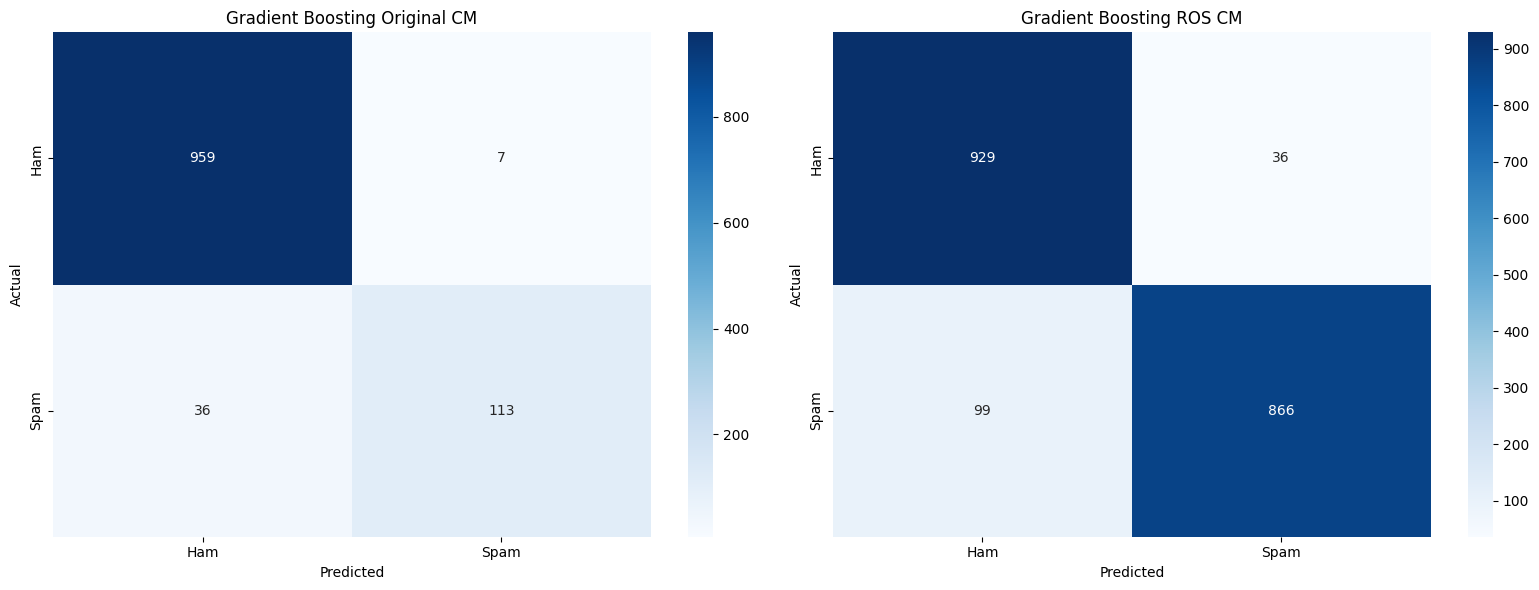

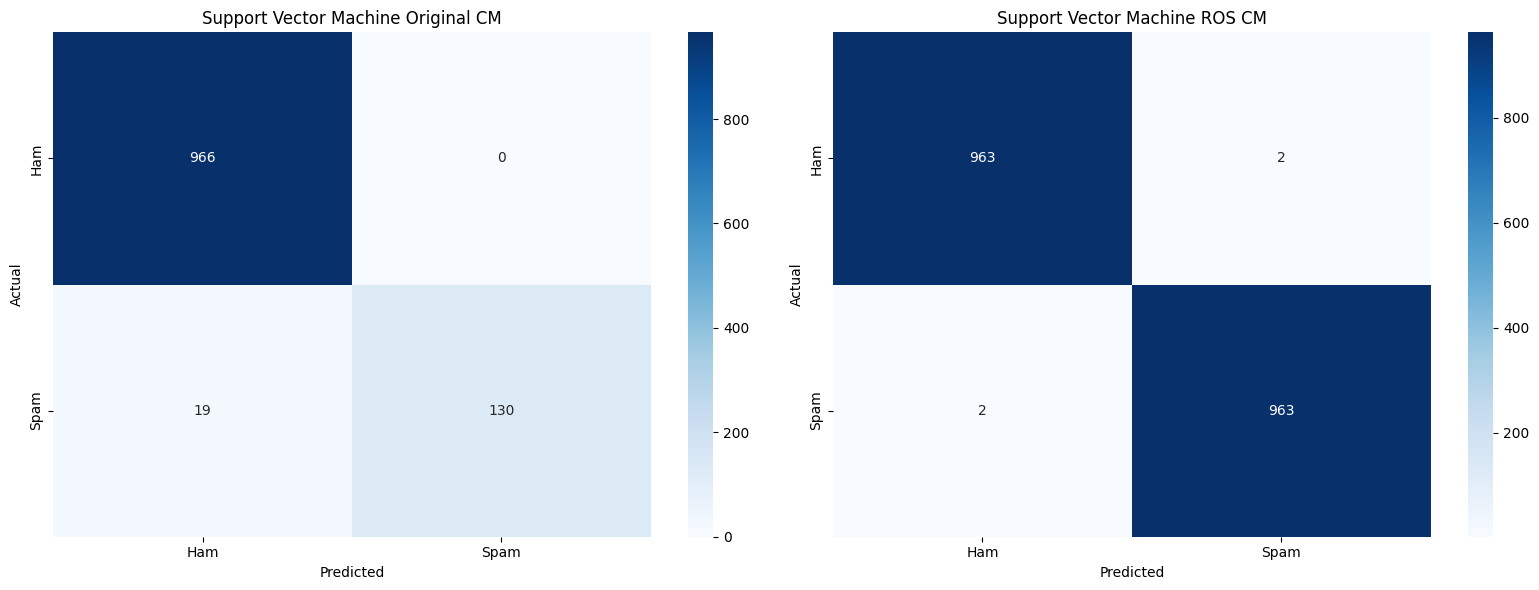

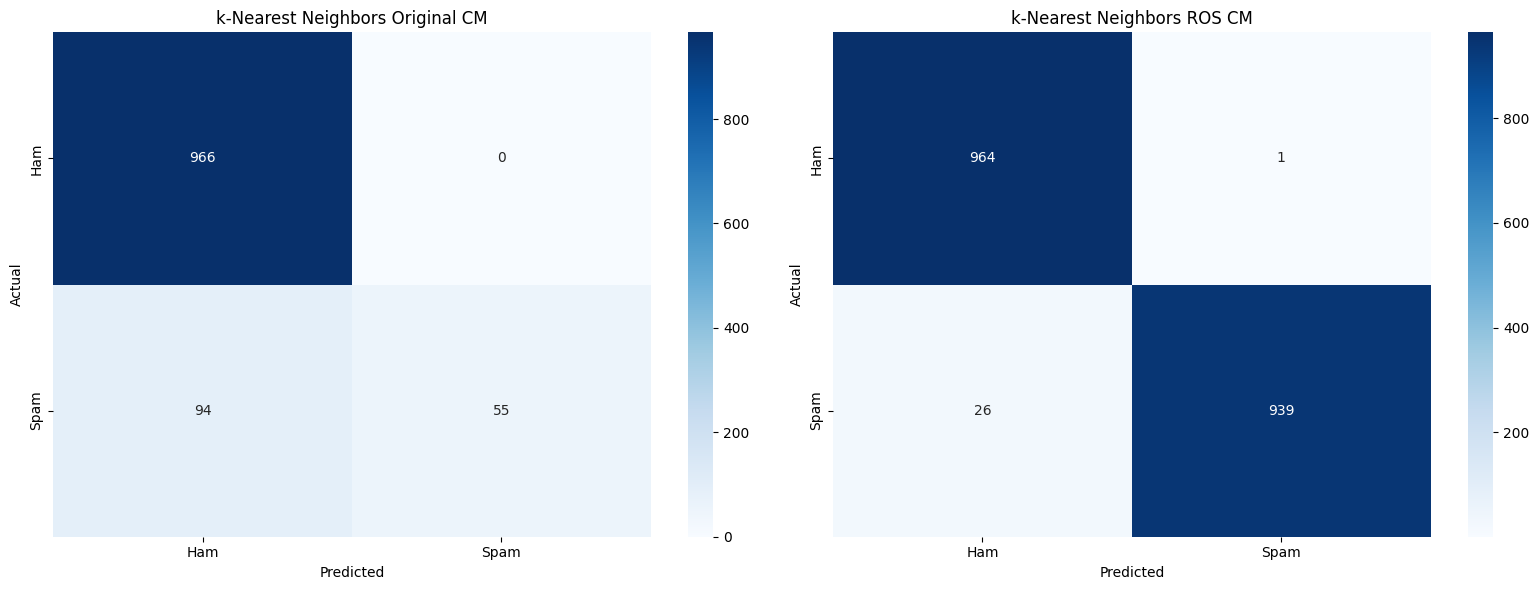

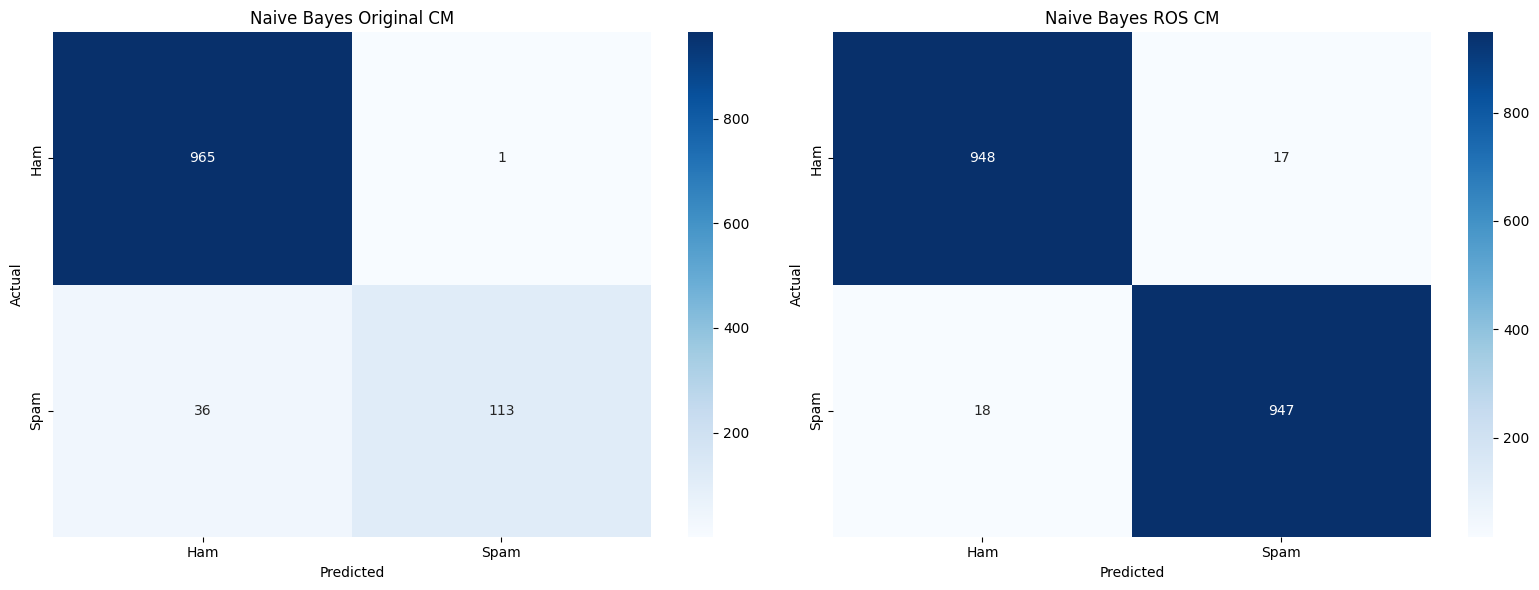

In [38]:
for model_name, result in evaluation_results.items():
    # Retrieve predictions and test data for original dataset
    eval_original = result['original']['train_test_split']
    y_pred_original = eval_original['y_pred']
    y_test_original = data_splits['original']['y_test']

    # Retrieve predictions and test data for ROS dataset
    eval_ros = result['ros']['train_test_split']
    y_pred_ros = eval_ros['y_pred']
    y_test_ros = data_splits['ros']['y_test']

    # Plot the confusion matrices side by side
    plot_confusion_matrices(y_test_original, y_pred_original,
                            y_test_ros, y_pred_ros, model_name)

### Analysis of Results

Overall, the ROS dataset generally improves model performance across all classifiers, reducing false positives and negatives. Logistic Regression, SVM, and especially Random Forest showed the most significant improvements with ROS.

The decision tree and gradient boosting models showed a mixed performance, suggesting the need for further tuning or alternative approaches for optimization.

k-NN and Naive Bayes also benefit from ROS, but their improvements are moderate compared to other models.

## Classification Report

The classification report is a performance evaluation metric that provides a comprehensive overview of the precision, recall, F1-score, and support for each class. This report helps in understanding the behavior of the classification model across different classes, highlighting its strengths and weaknesses.

Support is the number of actual occurrences of each class in the dataset. Itp orvides context for the precision, recall, and F1-score metrics.

In [42]:
from sklearn.metrics import classification_report

for model_name, datasets in evaluation_results.items():
    print(f"\nClassification Report for {model_name}")

    for dataset_name, dataset_info in datasets.items():
        if dataset_name == 'rus': continue
        
        y_test = data_splits[dataset_name]['y_test']
        y_pred = dataset_info['train_test_split']['y_pred']

        print(f"\n{dataset_name} dataset")
        print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Classification Report for Logistic Regression

original dataset
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


ros dataset
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.99      0.99      0.99       965

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930


Classification Report for Decision Tree

original dataset
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       966
        Spam       0.85      0.84      0.84       149

    accuracy                           0.96  

### Analysis of Results

From these results, it's clear that oversampling the minority class (ROS dataset) significantly improves the performance of all models, particularly in terms of recall for the Spam class. 

Among the models, Logistic Regression, Random Forest, and SVM stand out as the best performers, achieving near-perfect or perfect scores across all metrics when trained on the ROS dataset. This demonstrates their robustness and suitability for the spam classification task.